# Perspectives of developers regarding diversity and inclusion.

Studies have shown that diverse teams are more creative, better at solving problems, and more likely to introduce new products. In this context, understanding the impact of perceptions of diversity and inclusion on career satisfaction among developers becomes paramount for organizations aiming to foster inclusive environments and attract top talent.

Diversity and inclusion are not merely ethical imperatives but strategic advantages that drive better business outcomes. These practices lead to enhanced creativity, increased innovation, broader perspectives in decision-making processes, and improved employee satisfaction and retention.

This project leverages data from the Stack Overflow survey conducted in 2017 to gain insights into the perspectives of developers regarding diversity and inclusion in the workplace. We address the following crucial questions: 

1. Importance Rating: Understand how developers rate the importance of diversity and inclusion in their workplace.
2. Demographic Variances: Investigate potential differences in responses based on gender, race, or the highest education evel of parents. 
3. Correlation with Career Satisfaction: Explore the correlation between perceptions of diversity and inclusion and overall career satisfaction among developers.

## How important do developers rate diversity and inclusion in the workplace?
This analysis endeavors to shed light on how developers perceive the importance of diversity and inclusion within their
workplace. By examining these perceptions, we aim to provide insights into the current state of diversity and inclusion in
the tech industry and its impact on developers' satisfaction and engagement.
   
### My approach will involve:
Data cleaning and preprocessing to prepare the dataset for analysis.
Exploratory data analysis (EDA) to understand the distribution and patterns within the data.
Statistical analysis to identify correlations and differences in perceptions based on demographics.
Visualization of findings to communicate insights effectively.
 
To initiate the data wrangling process, we'll import essential libraries required for our tasks.
we'll utilize pandas and numpy for data manipulation and processing. Additionally, for creating basic 
visualizations, matplotlib and seaborn can serve as a valuable asset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. # Load the CSV file into a DataFrame

#df = pd.read_csv('survey-results-public.csv')
#df.head(5)

1.0

In [2]:
def load_dataset(filename):
    """
    Load a CSV file into a DataFrame and print its shape.
    
    Args:
    filename (str): The path to the CSV file.
    
    Returns:
    pandas.DataFrame: The loaded DataFrame.
    """
    df = pd.read_csv(filename)
    print("The Number of rows:", df.shape[0], "\nThe number of cols:", df.shape[1])
    return df


In [3]:
def print_unique_values(df, columns):
    """
    Print unique values for specified columns.
    
    Args:
    df (pandas.DataFrame): The DataFrame.
    columns (list): List of column names to print unique values for.
    """
    for column in columns:
        print(f"Unique values in '{column}':", list(df[column].unique()))


In [4]:
def calculate_null_proportions(df, columns):
    """
    Calculate and print the proportion of null values for specified columns.
    
    Args:
    df (pandas.DataFrame): The DataFrame.
    columns (list): List of column names to calculate null proportions for.
    """
    for column in columns:
        nulls = df[column].isnull().sum() / df.shape[0]
        print(f'Nulls in {column}: {nulls}')


Based on the nullson DiversityImportant and AssessJobDiversity features, I had to choose the best strategy,
which was a struggle, between removing nulls, and using a placeholder like "unkown" for imputation. 
In the end I chose using "unkown as the placeholder.The goal was to get greater isight on  importance of diversity and incusion at work in the development space.

In [5]:
def fill_nulls(df, replacements):
    """
    Fill null values in the DataFrame with specified replacements.
    
    Args:
    df (pandas.DataFrame): The DataFrame to fill nulls in.
    replacements (dict): Dictionary specifying the fill value for each column.
    
    Returns:
    pandas.DataFrame: The DataFrame with nulls filled.
    """
    return df.fillna(value=replacements)

In [6]:
def visualize_distribution(df, column, figure_label):
    """
    Visualize the distribution of a column using a countplot.
    
    Args:
    df (pandas.DataFrame): The DataFrame containing the data.
    column (str): The column to visualize.
    figure_label (str): Label for the x-axis including figure number.
    """
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.xlabel(figure_label, fontsize=12, labelpad=20)
    plt.show()

In [7]:
def generate_contingency_table(df, index, columns='count', save_formats=None):
    """
    Generate and print a contingency table, optionally saving it to file(s).
    
    Args:
    df (pandas.DataFrame): The DataFrame.
    index (str): Column name to use as the index of the contingency table.
    columns (str): Column name to use as the columns of the table. Defaults to 'count'.
    save_formats (dict): A dictionary where keys are formats ('excel', 'csv') and values are filenames to save the table.
    """
    table = pd.crosstab(index=df[index], columns=columns)
    print("Contingency Table:")
    print(table)
    
    if save_formats:
        for format, filename in save_formats.items():
            if format == 'excel':
                table.to_excel(filename, index=True)
            elif format == 'csv':
                table.to_csv(filename, index=True)

The Number of rows: 51392 
The number of cols: 154
Unique values in 'DiversityImportant': ['Agree', nan, 'Strongly agree', 'Somewhat agree', 'Strongly disagree', 'Disagree']
Unique values in 'AssessJobDiversity': ['Somewhat important', nan, 'Important', 'Not very important', 'Not at all important', 'Very important']
Nulls in DiversityImportant: 0.3986807285180573
Nulls in AssessJobDiversity: 0.572345890410959


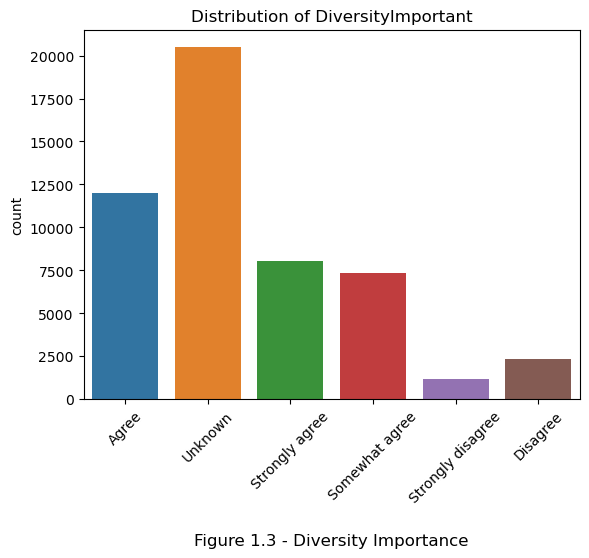

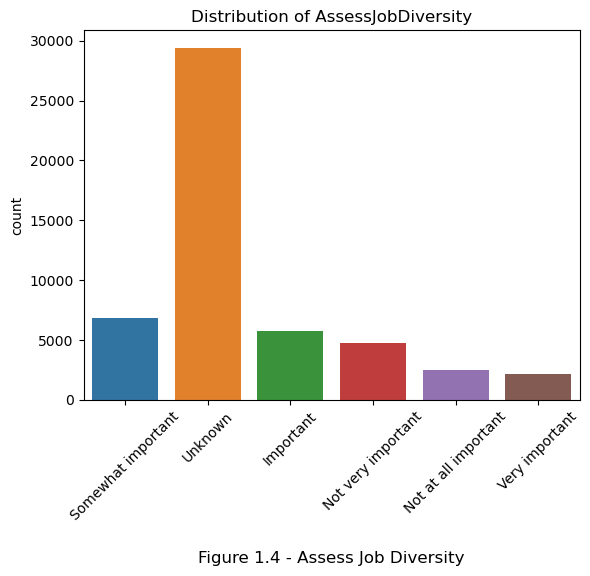

Contingency Table:
col_0               count
DiversityImportant       
Agree               12011
Disagree             2327
Somewhat agree       7363
Strongly agree       8022
Strongly disagree    1180
Unknown             20489


In [8]:
# Example usage:
df = load_dataset('survey-results-public.csv')
print_unique_values(df, ['DiversityImportant', 'AssessJobDiversity'])
calculate_null_proportions(df, ['DiversityImportant', 'AssessJobDiversity'])

df_filled = fill_nulls(df, {'DiversityImportant': 'Unknown', 'AssessJobDiversity': 'Unknown'})

visualize_distribution(df_filled, 'DiversityImportant', 'Figure 1.3 - Diversity Importance')
visualize_distribution(df_filled, 'AssessJobDiversity', 'Figure 1.4 - Assess Job Diversity')

generate_contingency_table(df_filled, 'DiversityImportant', save_formats={'excel': 'contingency_table.xlsx', 'csv': 'contingency_table.csv'})


In [9]:
# Step 1: Load the dataset
filename = 'survey-results-public.csv'
df = load_dataset(filename)

The Number of rows: 51392 
The number of cols: 154


In [10]:
# Step 2: Print the unique values in 'DiversityImportant' and 'AssessJobDiversity'
print_unique_values(df, ['DiversityImportant', 'AssessJobDiversity'])


Unique values in 'DiversityImportant': ['Agree', nan, 'Strongly agree', 'Somewhat agree', 'Strongly disagree', 'Disagree']
Unique values in 'AssessJobDiversity': ['Somewhat important', nan, 'Important', 'Not very important', 'Not at all important', 'Very important']


In [11]:
# Step 3: Check and print the proportion of null values
calculate_null_proportions(df, ['DiversityImportant', 'AssessJobDiversity'])

Nulls in DiversityImportant: 0.3986807285180573
Nulls in AssessJobDiversity: 0.572345890410959


In [12]:
# Step 4: Impute null values with "Unknown"
replacements = {'DiversityImportant': 'Unknown', 'AssessJobDiversity': 'Unknown'}
df_filled = fill_nulls(df, replacements)

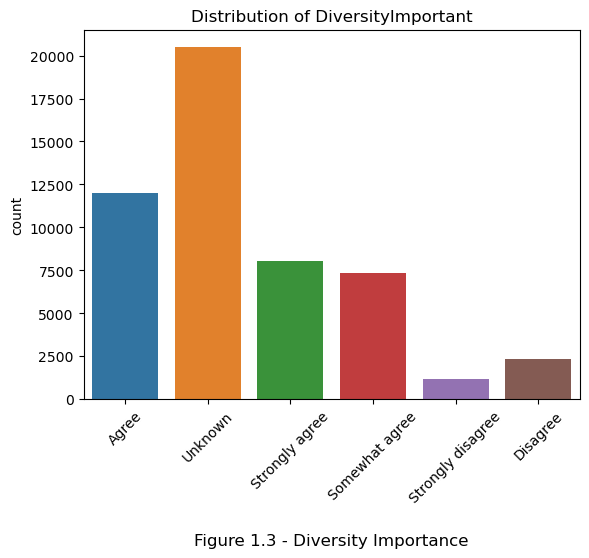

In [13]:
# Step 5: Visualize the distribution of responses for 'DiversityImportant'
visualize_distribution(df_filled, 'DiversityImportant', 'Figure 1.3 - Diversity Importance')

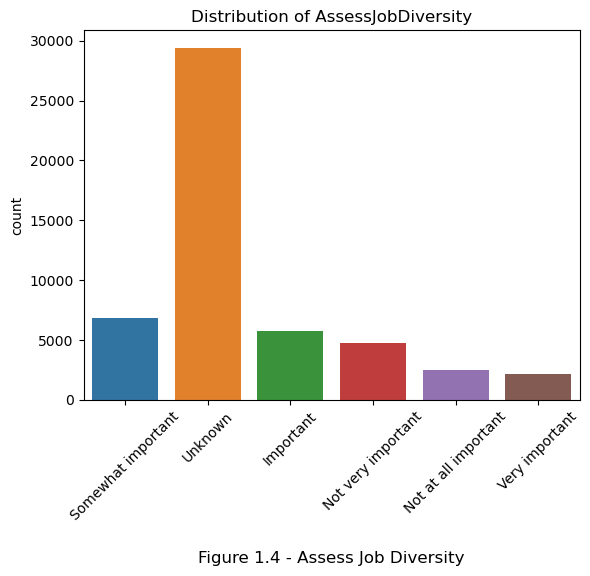

In [14]:
# Step 6: Visualize the distribution of responses for 'AssessJobDiversity'
visualize_distribution(df_filled, 'AssessJobDiversity', 'Figure 1.4 - Assess Job Diversity')


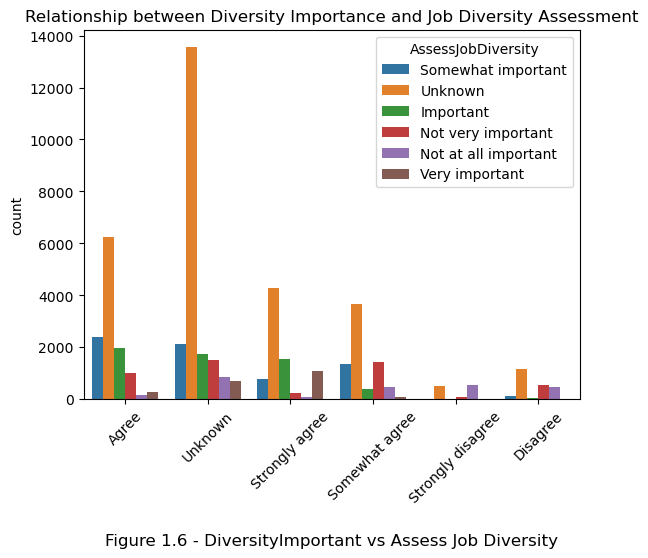

In [15]:
# Step 7: Explore the relationship between 'DiversityImportant' and 'AssessJobDiversity'
# This requires an extension of the visualize_distribution function to handle hue
# Alternatively, directly use seaborn here for this specific visualization
sns.countplot(x='DiversityImportant', hue='AssessJobDiversity', data=df_filled)
plt.title('Relationship between Diversity Importance and Job Diversity Assessment')
plt.xticks(rotation=45)
plt.xlabel('Figure 1.6 - DiversityImportant vs Assess Job Diversity', fontsize=12, labelpad=20)
plt.show()


In [16]:
# Step 8: Create and print a contingency table for 'DiversityImportant'
generate_contingency_table(df_filled, 'DiversityImportant')


Contingency Table:
col_0               count
DiversityImportant       
Agree               12011
Disagree             2327
Somewhat agree       7363
Strongly agree       8022
Strongly disagree    1180
Unknown             20489


In [17]:
# Step 9: Create and print a contingency table for 'AssessJobDiversity'
generate_contingency_table(df_filled, 'AssessJobDiversity')


Contingency Table:
col_0                 count
AssessJobDiversity         
Important              5713
Not at all important   2531
Not very important     4779
Somewhat important     6801
Unknown               29414
Very important         2154


In [18]:
# Step 10: Create a detailed contingency table for the relationship between 'DiversityImportant' and 'AssessJobDiversity', then save to Excel and CSV
contingency_table = pd.crosstab(df_filled['DiversityImportant'], df_filled['AssessJobDiversity'], margins=True, margins_name="Total")
print("Detailed Contingency Table:")
print(contingency_table)
contingency_table.to_excel('contingency_table.xlsx', index=True)
contingency_table.to_csv('contingency_table2.csv', index=True)


Detailed Contingency Table:
AssessJobDiversity  Important  Not at all important  Not very important  \
DiversityImportant                                                        
Agree                    1971                   161                 997   
Disagree                   41                   452                 542   
Somewhat agree            401                   453                1427   
Strongly agree           1558                    66                 225   
Strongly disagree           8                   552                  65   
Unknown                  1734                   847                1523   
Total                    5713                  2531                4779   

AssessJobDiversity  Somewhat important  Unknown  Very important  Total  
DiversityImportant                                                      
Agree                             2377     6231             274  12011  
Disagree                           133     1152               7   2327  
Some

## Evaluation

Diversity Importance
The "Unknown" category dominates, indicating a significant portion of respondents did not provide clear feedback on the importance of diversity. Among those who did, a substantial number agree or strongly agree with the importance of diversity, suggesting a positive inclination toward diversity and inclusion in the workplace. The presence of strong disagreement, though smaller, highlights a spectrum of opinions that need addressing.

Assessing Job Diversity
Similar to the previous table, the "Unknown" category is the largest. Among specified responses, "Somewhat important" and "Important" categories receive the highest counts, indicating a general recognition of job diversity's value. However, the existence of "Not at all important" responses indicates diverging viewpoints.

Detailed Contingency Table between Diversity Importance and Assessing Job Diversity
The detailed table shows that those who value diversity ("Agree" and "Strongly agree") also tend to find job diversity important. However, there's a noticeable alignment between those who "Strongly disagree" with the importance of diversity and those who find job diversity "Not at all important" or "Not very important," suggesting a consistent pattern in perspectives towards diversity.

## Conclusion 
This analysis reveals a positive trend towards recognizing the importance of diversity and inclusion within the tech industry. However, the presence of divergent views and a significant number of unknown responses indicate areas for improvement. Tech companies should consider the insights provided by this analysis to refine their diversity and inclusion strategies, aiming for a more inclusive, understanding, and productive workplace environment.